The purpose of this application is to help mineral exploration students to deal with stream sediments chemical data, aiming mineral exploration targeting. 
The objective of the app is:


1. import excel files
2. select variables/columns to work with
3. histogram and boxplot to define type of element distribution
4. create a Log vs probability graph (that's the thing no other software does) in a way you can figure the anomalous populations.
5. after all, the app should be able to split the data and return some descriptive statistics for each group of anomalous and background points (like: mean, median, stdv, first and second treshold)
7. all these graphs should be exportable.
8. a new column should be created at the excel file, or a new one, classifing the anomalies by order of magnitude.

plus: 

*   newton binomial model to fit points, with adjustable inflection points
*   .exe interface on PyQt






# Functions

In [24]:
#@title LIBRARIES { form-width: "100px" }
%pip install probscale
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import probscale
import os
import statsmodels.api as sm
# from google.colab import drive
# from google.colab import files
# drive.mount('/content/drive') # connects to your own Drive, regardless if collab if from someone else

sns.set()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#@title import_data() { form-width: "100px" }
def import_data():
  '''returns a dataFrame, store in a variable'''
  path = 'drive/MyDrive/' + input('drive/MyDrive/...')
  print('\nFILES:')
  display(os.listdir(f'{path}'))
  print()
  fileName = input('file name: ') 
  xls = pd.ExcelFile(f'{path}/{fileName}') # stores excel file
  print('\nSHEETS: ')
  display(xls.sheet_names) # list sheets
  print()
  sheet = input('load sheet: ') # select sheet
  database = pd.read_excel(f'{path}/{fileName}', sheet_name = sheet) # get data
  print()
  print(f'Data sample:\n{database.head()}') # display sample of data
  print('\nImport successful!')
  return database # to store in a var

In [22]:
#@title plot_histogram() { form-width: "100px" }
def plot_histogram(dist1):
  # HISTOGRAMS
  ax, fig = plt.subplots(figsize=(16,10), dpi = 300)
  
  # Histogram linear scale
  plt.subplot(221)
  
  sns.histplot(data=dist1, stat='count', bins=15, element='bars', kde=False, 
                    color='black', log_scale=None, legend=True, ax=None)
  
  ax.set(facecolor = "white")
  plt.grid(True, which="both", axis='both', alpha=0.2, color='black')
  
  plt.axvline(x=np.median(dist1), linestyle='dotted', label='Median', color='orange', lw=3)
  plt.axvline(x=np.average(dist1), linestyle='dotted', label='Average', color='red', lw=3)
  plt.legend()
  #plt.scale()
  plt.title('Distribuição de '+ dist1.name)
  plt.xlim(np.min(dist1)-0.5, np.max(dist1)+0.5)
  
  # Histogram log scale
  if np.min(dist1) > 0:
    plt.subplot(222)
    
    sns.histplot(data=dist1, stat='count', bins=15, element='bars', kde=False, 
                      color='black', log_scale=True, legend=True, ax=None)
    
    ax.set(facecolor = "white")
    plt.grid(True, which="both", axis='both', alpha=0.2, color='black')
    plt.axvline(x=np.median(dist1), linestyle='dotted', label='Median', color='orange', lw=3)
    plt.axvline(x=np.average(dist1), linestyle='dotted', label='Average', color='red', lw=3)
    plt.legend()
    #plt.scale()
    plt.title('Distribuição de '+ dist1.name)
    plt.xlim(np.min(dist1), np.max(dist1)+0.5)
  
  else:
    print('There\'s 0 values, log scale is not available')

  plt.show()

In [5]:
#@title plot_boxplot() { form-width: "100px" }
def plot_boxplot(dist1, ylim = None, ylimlog = None):
  # BOXPLOTS
  ax, fig = plt.subplots(figsize=(6,10), sharex = True)
  
  # Box plot linear scale
  plt.subplot(221)
  sns.boxplot(y=dist1, color='white', orient="v", )
  if ylim != None:
    plt.ylim(ylim[0], ylim[1])
  
  # Box plot log scale
  plt.subplot(222)
  sns.boxplot(y=np.log(dist1), color='white', orient="v")
  
  
  if ylimlog != None:
    plt.ylim(ylimlog[0], ylimlog[1])
  
  plt.show()

In [36]:
#@title plot_logprob() { form-width: "100px" }
def plot_logprob(data, cutoff = None, xlim = None, ylim = None):
    y = (-1)*np.sort(-data)
    #y = np.arange(1, len(x)+1)/len(x)
    
    fig, ax = plt.subplots(figsize=(10, 7), dpi = 300)
    
    #for some reason, the prob scale works this way, you input just the data for Y axis, the X is the probability
    probscale.probplot(y, plottype='prob', probax='x', problabel=None, datascale='log', 
                       scatter_kws=dict(marker='o', alpha=1, markersize=1.4, color='0'))
    
    ax.set(facecolor = "white")

    if xlim != None:
      ax.set(xlim = (xlim[0], xlim[1]))
    if ylim != None:
      ax.set(ylim = (ylim[0], ylim[1]))

    plt.grid(True, which="both", axis='both', alpha=0.2, color='black')
    #plt.semilogy(y[::-1], x, 'o', markersize=0.2, )
    
    # title 
    plt.title(str(data.name) +' Log x Accumulated probability')
    
    # axis legend
    plt.xlabel('Probability (%)')
    plt.ylabel(data.name)
    
    # frame
    ax.spines['bottom'].set_color('0')
    ax.spines['top'].set_color('0')
    ax.spines['right'].set_color('0')
    ax.spines['left'].set_color('0')
    
    # set cutoff
    if cutoff != None:
      for i in range(0, len(cutoff)):
        plt.axvline(cutoff[i], linestyle='dotted', color='red', label=f'cut-off {cutoff[i]}', linewidth=1.2)

    plt.xticks(rotation = 90)
    
    plt.show()

# Project

In [13]:
DB = pd.read_table('C:\Repositories\Geoprospec_LogProbPlots\Data\Teores de W.csv', sep=';')

In [26]:
DB.columns

Index(['Au/Ag', 'W ppm ME-MS61', 'Ln(W)'], dtype='object')

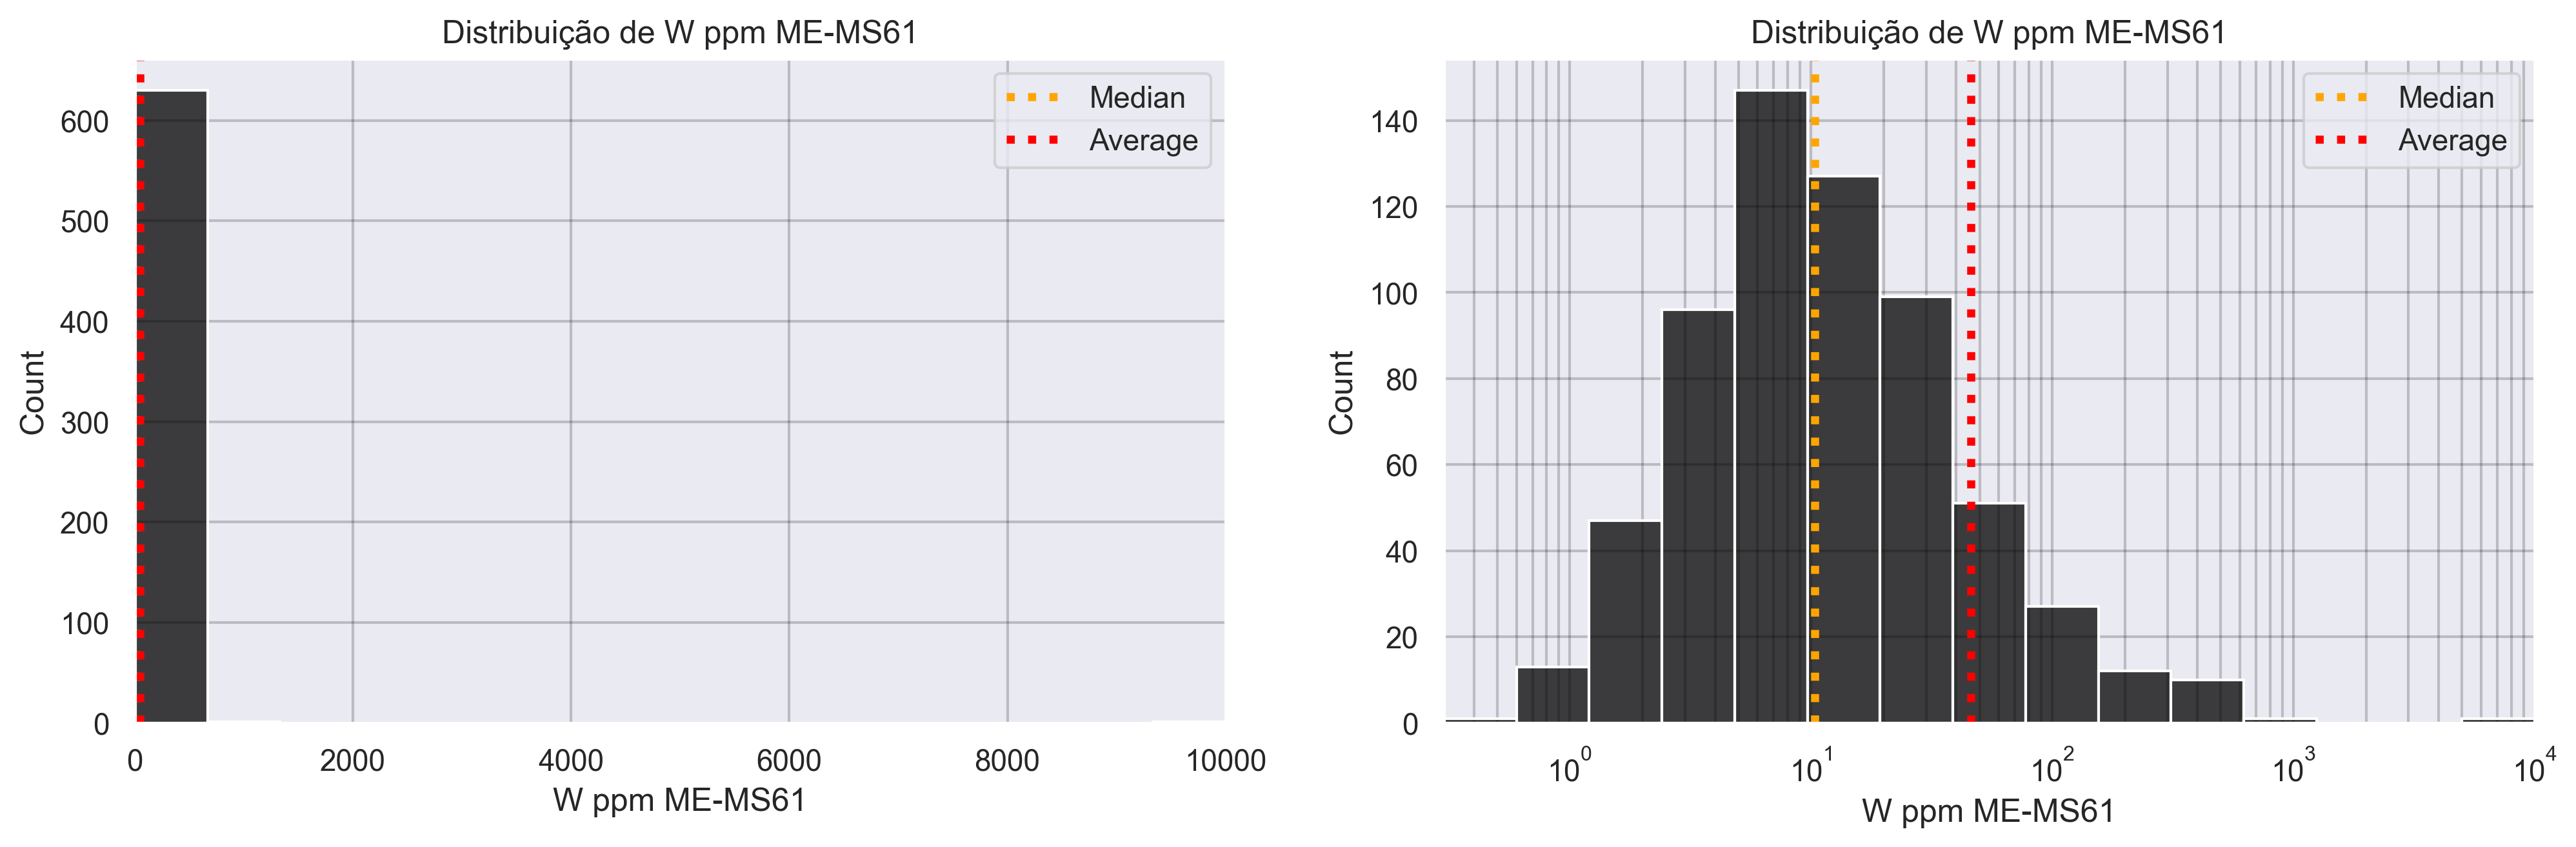

In [23]:
plot_histogram(DB['W ppm ME-MS61'])

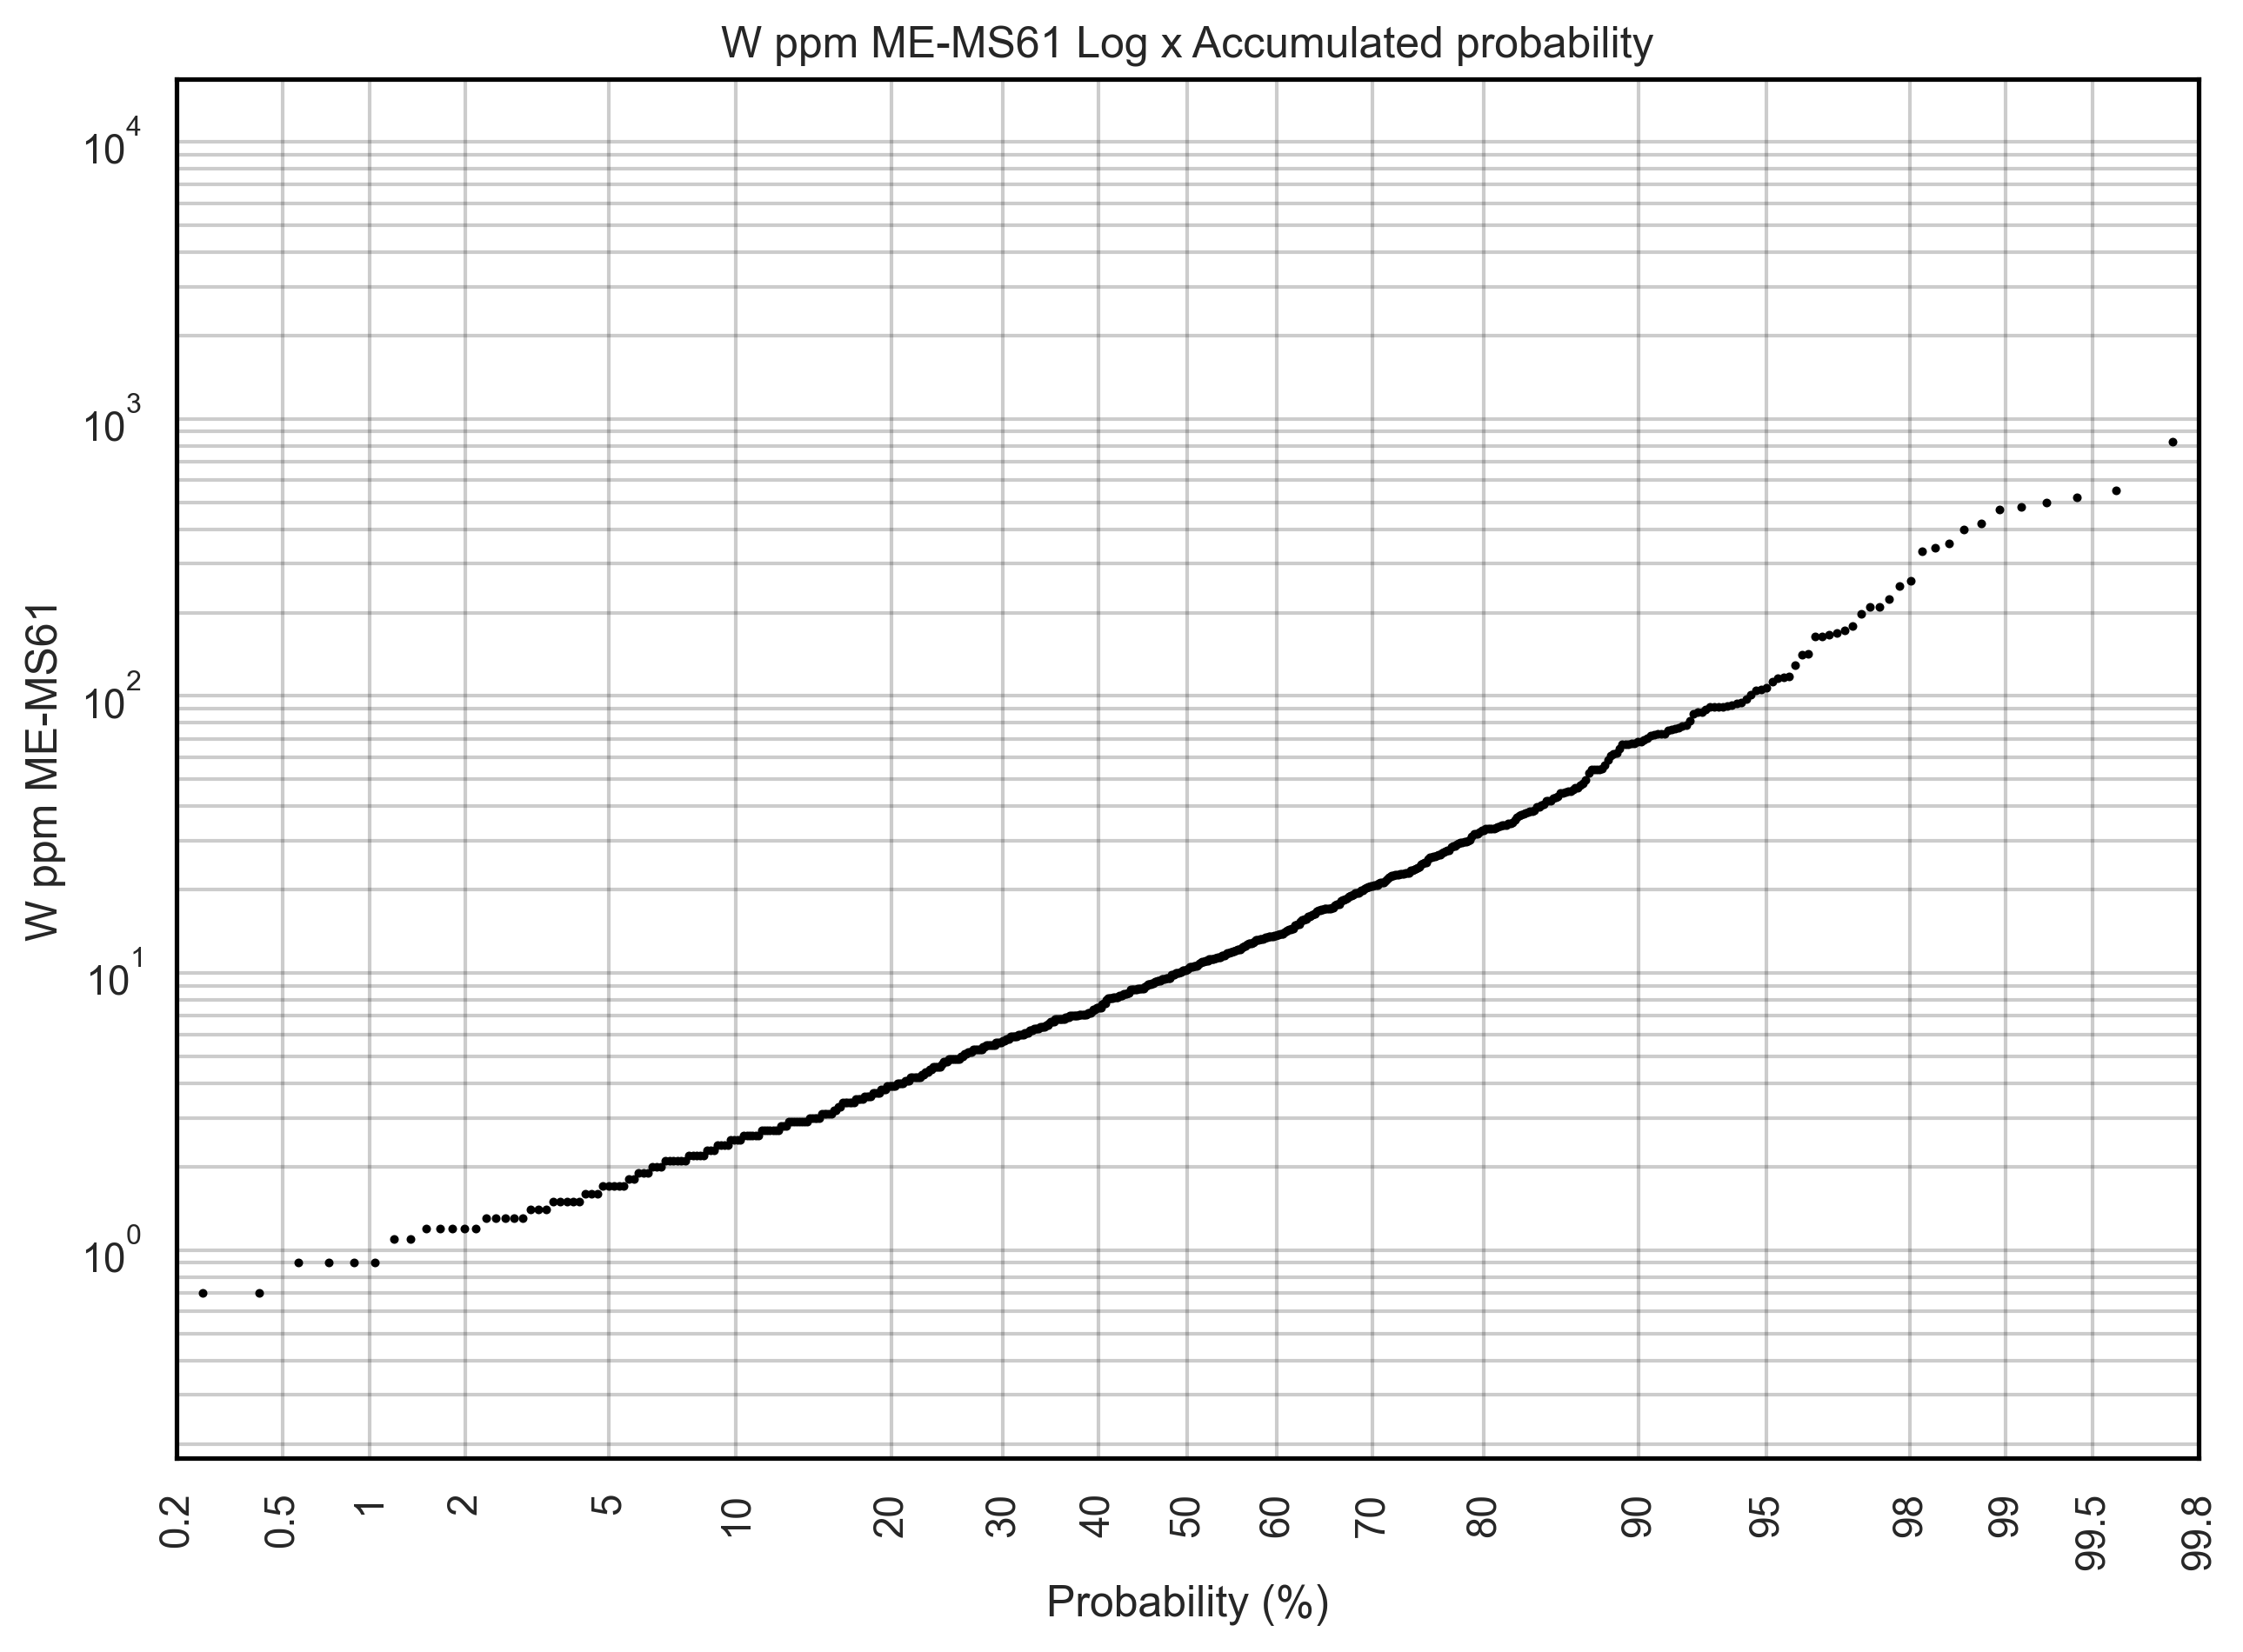

In [38]:
plot_logprob(DB['W ppm ME-MS61'], 
# cutoff = (99.855, 99.96), 
xlim = (0.2, 99.8), 
# ylim = (0.01,100)
)